In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [22]:
#Dense Layer
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape= [None, 5])
layer(tf.zeros([10, 5]))

<tf.Tensor: id=23078, shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0

In [13]:
#Dense Layer 参数
layer.variables
layer.trainable_variables

[<tf.Variable 'dense_4/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[-1.81796819e-01, -2.16631830e-01,  1.90142289e-01,
          5.51227182e-02, -1.79411322e-01, -2.36035138e-02,
         -7.46633708e-02, -2.18825042e-03,  5.41033000e-02,
         -1.01958439e-01,  8.16970021e-02,  1.03731498e-01,
         -1.11067966e-01,  1.63650796e-01, -1.44078791e-01,
         -8.95845890e-02, -6.56357557e-02, -1.53866231e-01,
          8.23079497e-02,  1.73204228e-01,  1.70616016e-01,
         -1.57684535e-01, -2.79561728e-02, -2.34621882e-01,
         -1.67107284e-01, -2.25717723e-02,  2.29671761e-01,
         -8.63659382e-03, -1.31952971e-01, -6.62367940e-02,
          2.02643350e-01, -1.57081440e-01, -1.06852755e-01,
          3.44269425e-02,  1.41368940e-01,  1.94428906e-01,
          4.64460105e-02, -2.14720801e-01, -1.61444247e-01,
         -5.79643846e-02, -1.70251578e-02, -1.44058049e-01,
         -1.32041931e-01,  2.08886117e-02,  1.07796326e-01,
         -1.00555569e-02,  8.3

In [ ]:
#自定义损失函数

def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [38]:
#  lambda方式
#  tf.nn.softplus: log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
print(customized_softplus([-10., -5., 0., 5., 10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [33]:
#  子类方式 自定义 Dense Layer

class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        """构建需要的参数"""
        """input_shape = [None, a]   output_shape = [None, b]"""
        """W [a, b]"""
        self.kernel = self.add_weight(name= 'kernel', shape= (input_shape[1], self.units), initializer= "uniform", trainable= True)
        self.bais = self.add_weight(name= 'bais', shape= (self.units, ), initializer='zeros', trainable= True)
        super(CustomizedDenseLayer, self).build(input_shape)
        
    def call(self, x):
        """完成正向计算"""
        return self.activation(x @ self.kernel + self.bais)

In [39]:
model = keras.models.Sequential([
    CustomizedDenseLayer(32, activation='relu',input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus
    # keras.layers.Dense(1, activation= "softplus")
    #keras.layers.Dense(1), keras.layers.Activation("softplus")
])

model.summary()
model.compile(loss=customized_mse, optimizer="sgd", metrics=["mean_squared_error"])
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_6 (Cu (None, 32)                288       
_________________________________________________________________
customized_dense_layer_7 (Cu (None, 1)                 33        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 110us/sample - loss: 1.1831 - mean_squared_error: 1.1831 - val_loss: 0.6746 - val_mean_squared_error: 0.6746
Epoch 2/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5916 - mean_squared_error: 0.5916 - val_loss: 0.5909 - val_mean_squared_error: 0.5909
Epoch 3/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5208 - mean_squared_error: 0.5208 - val_loss: 0.5212 - val_mean_squared_error: 0.5212
Epoch 4/100
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4805 - mean_squared_error: 0.4805 - val_loss: 0.5053 - val_mean_squared_error: 0.5053
Epoch 5/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4604 - mean_squared_error: 0.4604 - val_loss: 0.4770 - val_mean_squared_error: 0.4770
Epoch 6/100
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4436 - mean_squa

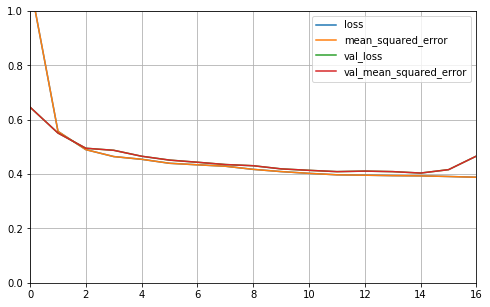

In [36]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [37]:
model.evaluate(x_test_scaled, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4144549472387447, 0.41445488]